# Probability and Distributions

Based on: https://github.com/cs109/2015lab3/blob/master/Lab3-probability.ipynb

In [1]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
def throw_a_coin(N):
    return np.random.choice(['H','T'], size=N)
throws=throw_a_coin(40)
print ("Throws:"," ".join(throws))
print ("Number of Heads:", np.sum(throws=='H'))
print ("p1 = Number of Heads/Total Throws:", np.sum(throws=='H')/40.)

Throws: T T T T H H T H H H H H T H H H H H T T T T H H T T H T H H T H H H T T T H T H
Number of Heads: 22
p1 = Number of Heads/Total Throws: 0.55


C:\Users\Chris\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


(array([0.425, 0.45 , 0.475, 0.5  , 0.525]),
 <a list of 5 Text yticklabel objects>)

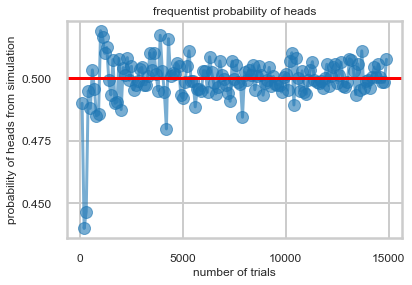

In [3]:
trials = np.arange(0,15000,100)
plt.plot(trials, [np.sum(throw_a_coin(j)=='H')/np.float(j) for j in trials], 'o-', alpha=0.6);

plt.axhline(0.5, 0, 1, color='r');
plt.xlabel('number of trials',fontsize =12);
plt.ylabel('probability of heads from simulation',fontsize =12);
plt.title('frequentist probability of heads',fontsize =12);
plt.xticks(fontsize =12)
plt.yticks(fontsize =12)

### A simple election model

In the last section, we made a simple simulation of a coin-toss on the computer from a fair-coin model which associated equal probability with heads and tails. Let us consider another model here, a table of probabilities that PredictWise made on October 2, 2012 for the US presidential elections. PredictWise aggregated polling data and, for each state, estimated the probability that the Obama or Romney would win. Here are those estimated probabilities:

In [4]:
predictwise = pd.read_csv('2015lab3/predictwise.csv').set_index('States')
predictwise.head()

,Obama,Romney,Votes
States,,,
Alabama,0.000,1.000,9
Alaska,0.000,1.000,3
Arizona,0.062,0.938,11
Arkansas,0.000,1.000,6
California,1.000,0.000,55


In [5]:
reshape = predictwise.Obama.values.reshape(-1, 1)
reshape

array([[0.   ],
       [0.   ],
       [0.062],
       [0.   ],
       [1.   ],
       [0.807],
       [1.   ],
       [1.   ],
       [1.   ],
       [0.72 ],
       [0.004],
       [1.   ],
       [0.   ],
       [1.   ],
       [0.036],
       [0.837],
       [0.   ],
       [0.   ],
       [0.   ],
       [1.   ],
       [1.   ],
       [1.   ],
       [0.987],
       [0.982],
       [0.   ],
       [0.074],
       [0.046],
       [0.   ],
       [0.851],
       [0.857],
       [0.998],
       [0.985],
       [1.   ],
       [0.349],
       [0.025],
       [0.89 ],
       [0.   ],
       [0.976],
       [0.978],
       [1.   ],
       [0.   ],
       [0.001],
       [0.001],
       [0.   ],
       [0.   ],
       [1.   ],
       [0.798],
       [0.999],
       [0.002],
       [0.925],
       [0.   ]])

In [6]:
def simulate_election(model, n_sim):
    simulations = np.random.uniform(size=(51, n_sim))
    obama_votes = (simulations < model.Obama.values.reshape(-1, 1)) * model.Votes.values.reshape(-1, 1)
    return obama_votes.sum(axis=0)

In [7]:
result = simulate_election(predictwise, 10000)
print ((result >= 269).sum())

9954


In [8]:
result

array([332, 338, 357, ..., 358, 323, 326], dtype=int64)

In [9]:
def plot_simulation(simulation):
        with sns.axes_style('darkgrid'):
            plt.figure(figsize=(16,12))
            plt.hist((simulation), bins = np.arange(200,500,1),lw = 0, alpha=0.5, label = 'simulations', align = 'left', density = True)
            plt.axvline(332, 0, 0.5, color = 'r', label = 'actual')
            plt.axvline(269, 0, 0.5, color = 'k', label = 'victory')
            plt.axvline(simulation.mean(), 0, 0.5,color = 'b', label = 'mean')
            p05 = np.percentile(simulation, 5.)
            p95 = np.percentile(simulation, 95.)
            iq = int(p95-p05)
            pwin = ((simulation >=269).mean()*100)
            plt.title("chance of Obama victory: %0.2f%%, Spread: %d votes" % (pwin, iq))
            plt.legend()
            plt.xlabel("Obama Electoral College Votes")
            plt.ylabel("Probability")

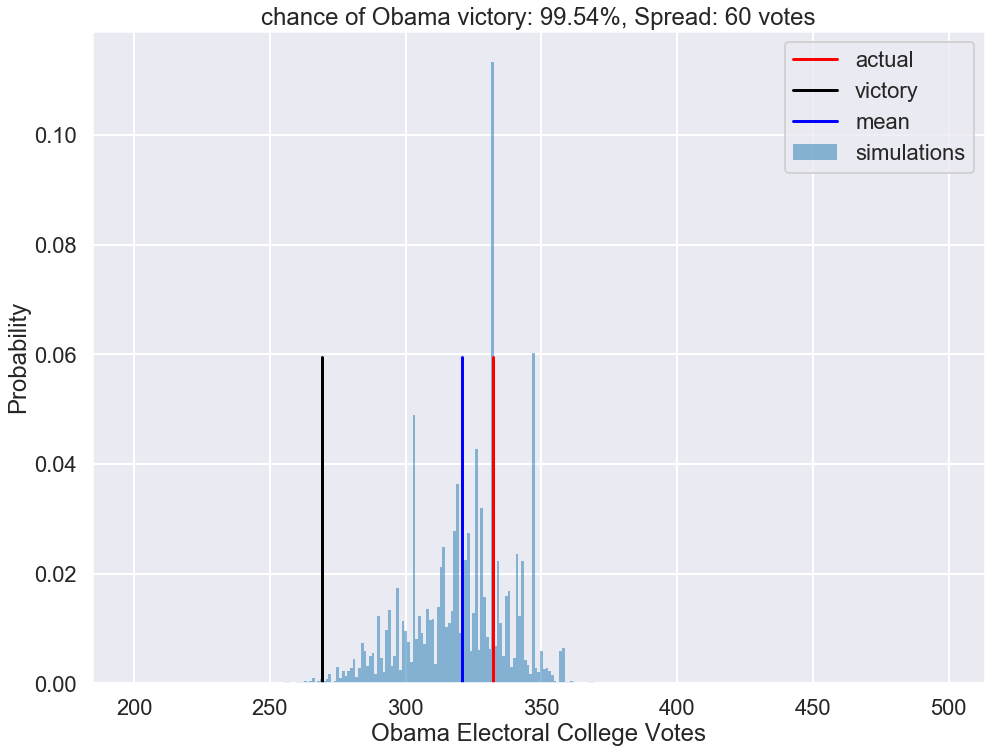

In [10]:
plot_simulation(result)

Matplotlib colours can be found here: https://matplotlib.org/2.0.2/api/colors_api.html

### Bernoulli Random Variables

In [11]:
from scipy.stats import bernoulli
#bernoulli random variable
brv=bernoulli(p=0.3)
brv.rvs(size=20)

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0])

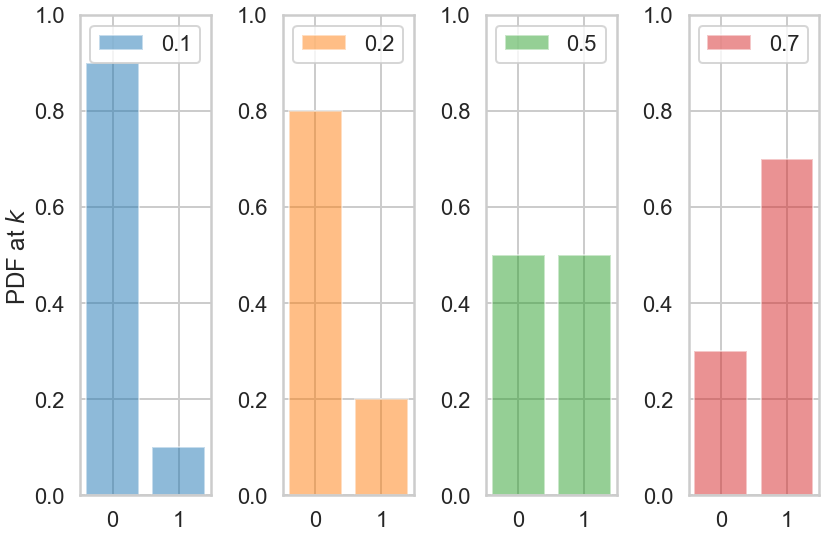

In [12]:
event_space=[0,1]
plt.figure(figsize=(12,8))
colors=sns.color_palette()
for i, p in enumerate([0.1, 0.2, 0.5, 0.7]): # if we remember, enumerate gives us the iterable object and adds a counter
    ax = plt.subplot(1, 4, i+1)
    plt.bar(event_space, bernoulli.pmf(event_space, p), label=p, color=colors[i], alpha=0.5)
    # plt.plot(event_space, bernoulli.cdf(event_space, p), color=colors[i], alpha=0.5)

    ax.xaxis.set_ticks(event_space)
   
    plt.ylim((0,1))
    plt.legend(loc=0)
    if i == 0:
        plt.ylabel("PDF at $k$")
plt.tight_layout()

### Empirical Distribution

* Probability Mass Function = shows P(X=x)
* Cumulative Distribution Function = shows P(X<x)

In [16]:
CDF = lambda x: np.float(np.sum(result < x))/result.shape[0]
for votes in [200, 300, 320, 340, 360, 400, 500]:
    print("Obama Win CDF at votes=", votes, " is ", CDF(votes))

Obama Win CDF at votes= 200  is  0.0
Obama Win CDF at votes= 300  is  0.1397
Obama Win CDF at votes= 320  is  0.4449
Obama Win CDF at votes= 340  is  0.8331
Obama Win CDF at votes= 360  is  0.9983
Obama Win CDF at votes= 400  is  1.0
Obama Win CDF at votes= 500  is  1.0


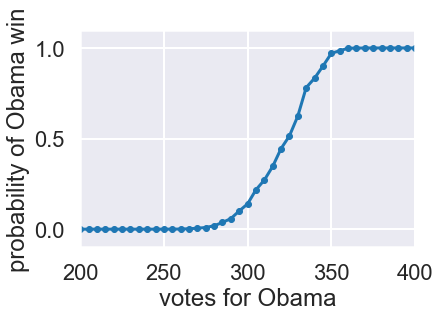

In [22]:
votelist=np.arange(0,540,5)
with sns.axes_style('darkgrid'):
    plt.plot(votelist, [CDF(v) for v in  votelist], '.-');
    plt.xlim([200,400])
    plt.ylim([-0.1,1.1])
    plt.xlabel("votes for Obama")
    plt.ylabel("probability of Obama win");

### Binomial Distribution:

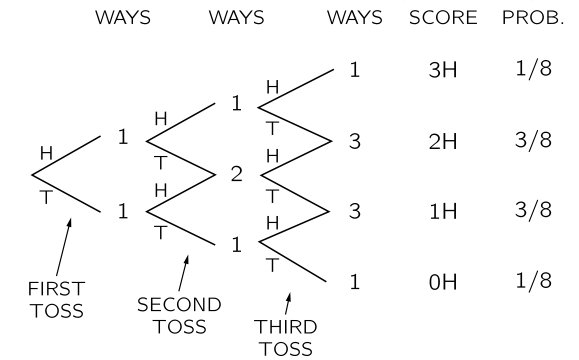

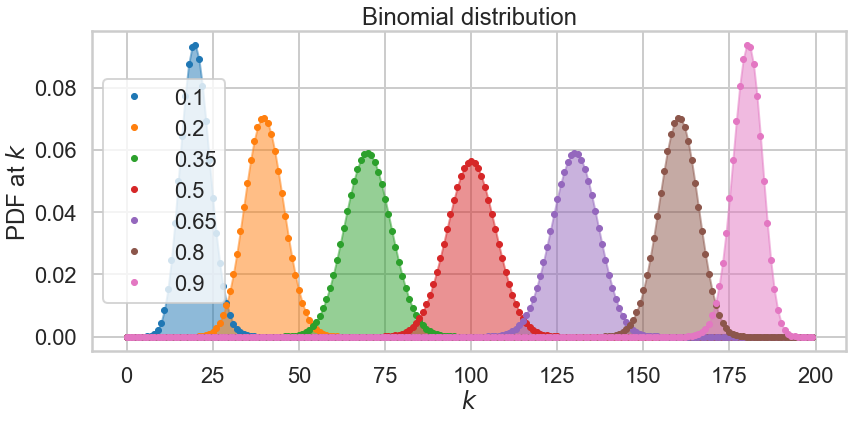

In [28]:
from scipy.stats import binom
plt.figure(figsize=(12,6))
k = np.arange(0, 200)
for p, color in zip([0.1, 0.2, 0.35 , 0.5, 0.65, 0.8, 0.9], colors):
    rv = binom(200, p)
    plt.plot(k, rv.pmf(k), '.', lw=2, color=color, label=p)
    plt.fill_between(k, rv.pmf(k), color=color, alpha=0.5)
q=plt.legend()
plt.title("Binomial distribution")
plt.tight_layout()
q=plt.ylabel("PDF at $k$")
q=plt.xlabel("$k$")

# VERY USEFUL:

The various ways to get random numbers
1. np.random.choice chooses items randomly from an array, with or without replacement
2. np.random.random gives us uniform randoms on [0.0,1.0)
3. np.random.randint gives us random integers in some range
4. np.random.randn gives us random samples from a Normal distribution
5. scipy.stats.distrib gives us stuff from a distribution. Here distrib could be binom for example, as above. distrib.pdf or distrib.pmf give us the density or mass function, while cdf gives us the cumulaive distribution function. Just using distrib as a function with its params creates a random variable generating object, from which random variables can be generated in the form distrib(params).rvs(size).